In [1]:
#!pip install rioxarray # for DEM input

In [2]:
#Set Morton level
level = 6
# Seed
the_seed = 2017

In [3]:
import geopandas as gpd
from shapely.geometry import Polygon,box
import shapely as shapely

In [4]:
# Import the necessary libraries.
from PIL import Image
import numpy as np

In [5]:
import math
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon,box
import matplotlib.pyplot as plt
import pandas as pd
import shapely as shapely
from shapely.geometry import Polygon
print('libraries installed')
from osgeo import osr
from scipy.spatial import ConvexHull


libraries installed


In [6]:
df_tiger7203 = gpd.read_file("tiger_points_anon.shp")
df_tiger7203_sp  = df_tiger7203.to_crs({'init': 'epsg:32647'}) #

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [7]:
def coord_lister(geom):
    coords = list(geom.exterior.coords)
    return (coords)

import pandas as pd
buff_size = 750

DT_poly 
MULTILINESTRING ((578165.6979813166 1755084.006865027, 579026.6809569178 1752282.032910668), (577387.7549659959 1756511.245626795, 578165.6979813166 1755084.006865027), (574955.0811933321 1757402.9420535224, 577387.7549659959 1756511.245626795), (573766.7627737803 1757820.1466308406, 574955.0811933321 1757402.9420535224), (573156.2663902519 1756833.1023615873, 573766.7627737803 1757820.1466308406), (572875.4657817807 1755904.9198575376, 573156.2663902519 1756833.1023615873), (572714.5767890583 1752366.514515896, 572875.4657817807 1755904.9198575376), (572713.5793650199 1752252.5895093782, 572714.5767890583 1752366.514515896), (572713.5793650199 1752252.5895093782, 576938.4124783459 1749355.7264802617), (576938.4124783459 1749355.7264802617, 577418.7383107262 1749340.656314227), (577418.7383107262 1749340.656314227, 578473.6625600888 1750793.8616661155), (578473.6625600888 1750793.8616661155, 579026.6809569178 1752282.032910668), (578473.6625600888 1750793.8616661155, 578698.12

<Axes: >

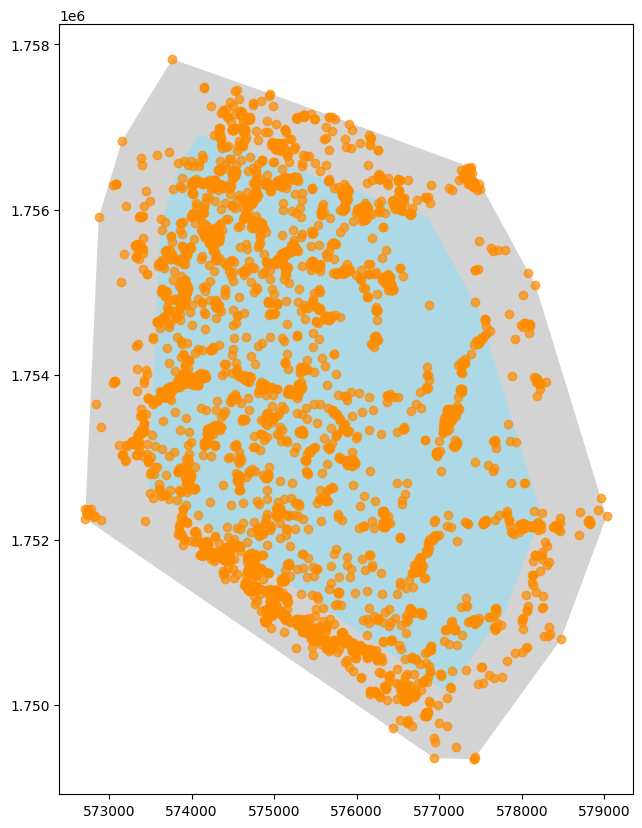

In [8]:
series_tiger7203_sp = gpd.GeoSeries(df_tiger7203_sp['geometry'])
#series_tiger7203_hr_sp = gpd.GeoSeries(df_tiger_hr_sp['geometry'])

np_ch = series_tiger7203_sp.to_numpy()
xcoord = [np_ch[i].x for i in range(len(np_ch))]
ycoord = [np_ch[i].y for i in range(len(np_ch))]
xy_stack = np.column_stack((xcoord,ycoord))

# Convex Hull
np_ch_b = ConvexHull(xy_stack,qhull_options="Qt")

# Dalaunay triangulation
xy_poly = Polygon(xy_stack)
DT_poly = shapely.delaunay_triangles(xy_poly,only_edges=True)
print("DT_poly ")
print(DT_poly )
xy_points = shapely.points(xy_stack)
print("xy_points ")

DT = gpd.GeoSeries([DT_poly]).__geo_interface__

DT = gpd.GeoDataFrame.from_features(DT)
DT.crs = "EPSG:32647"

# Concave Hull
CC_Hull = shapely.concave_hull(xy_points)
print("CC_Hull ")
print(CC_Hull)

CC_poly  = Polygon(CC_Hull)
print("CC_poly ")
print(CC_poly)

CC = gpd.GeoSeries([CC_poly]).__geo_interface__
CC = gpd.GeoDataFrame.from_features(CC)
CC.crs = "EPSG:32647"

# back to convex hull
print("")
print ("boundary of hull ",xy_stack[np_ch_b.vertices,0], xy_stack[np_ch_b.vertices,1])
print('separate')
bx = xy_stack[np_ch_b.vertices,0]
by = xy_stack[np_ch_b.vertices,1]
print(bx)
print(by)
print('after bx and by')
bxy = []

for i in range(len(by)):
    bxy.append([bx[i],by[i]])
xy_arr = np.array(bxy)
xy_poly = Polygon(xy_arr)
print(xy_poly)

df_xy = gpd.GeoSeries([xy_poly]).__geo_interface__
df_xy = gpd.GeoDataFrame.from_features(df_xy)
df_xy.crs = "EPSG:32647"

# # get the interior buffer
# from shapely.geometry import Polygon as P_gon
# from shapely.geometry import LinearRing

# buff_distance = 1500
# xy_coords = df_xy.geometry.apply(coord_lister)

# print(type(xy_coords))
# r = (pd.Series.tolist(xy_coords))

# Note: we will use df_buff for testing different Morton levels vs original data

buff_one = xy_poly.buffer(-buff_size,resolution=16) # inner
df_buff = gpd.GeoSeries([buff_one]).__geo_interface__
df_buff = gpd.GeoDataFrame.from_features(df_buff)
df_buff.crs = "EPSG:32647"

minx, miny, maxx, maxy = series_tiger7203_sp.geometry.total_bounds
#print(minx, miny, maxx, maxy)
fig, ax = plt.subplots(figsize=(10, 10))
df_xy.plot(ax=ax,color="lightgrey")
# #
df_buff.plot(ax=ax,color="lightblue")

#DT.plot(ax=ax,color="lightgrey")
#CC.plot(ax=ax,color="lightblue")
series_tiger7203_sp.plot(ax=ax, alpha=0.7, color="darkorange")



<Axes: >

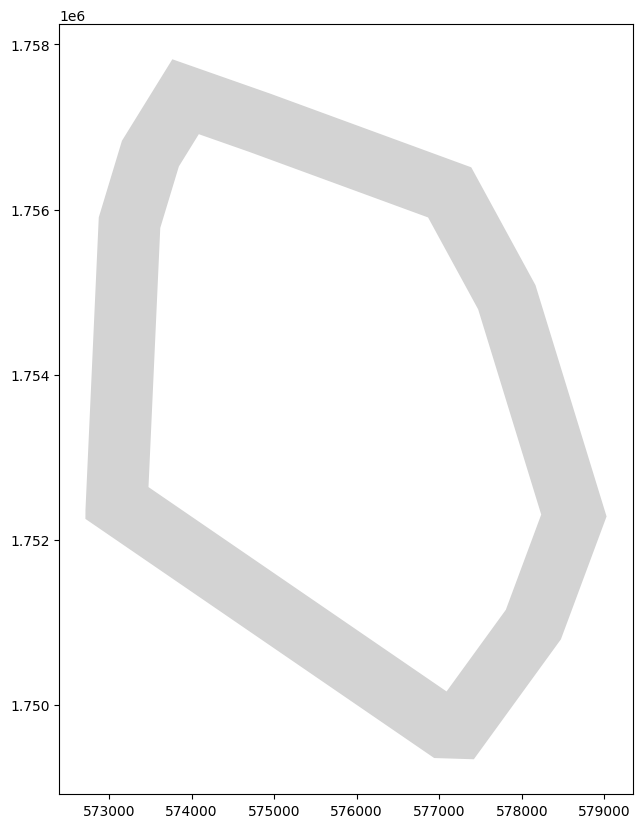

In [9]:
# overlay
border_poly = df_xy.overlay(df_buff, how='difference')
fig, ax = plt.subplots(figsize=(10, 10))
border_poly.plot(ax=ax,color="lightgrey")


In [10]:
print(type(border_poly))
print(type(series_tiger7203_sp))
print(border_poly)
df_tig = gpd.GeoDataFrame(gpd.GeoSeries(series_tiger7203_sp))
type(df_tig)
print(type(df_tig))
#gdf = gpd.GeoDataFrame({'geometry':border_poly})
#df_border = gpd.GeoDataFrame(gpd.GeoSeries(border_poly))
# df_b = [border_poly.iloc[i].geometry for i in range(len(border_poly))]




<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
                                            geometry
0  POLYGON ((572714.577 1752366.515, 572875.466 1...
<class 'geopandas.geodataframe.GeoDataFrame'>


In [11]:
border_points = gpd.sjoin(df_tig,border_poly, how="inner", op='within')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [12]:
poly_centroid = []
poly_centroid.append(border_poly.centroid)
print(type(poly_centroid[0].x))
print('')
print(border_points.iloc[0].geometry.x)

<class 'pandas.core.series.Series'>

574377.2118358931


<Axes: >

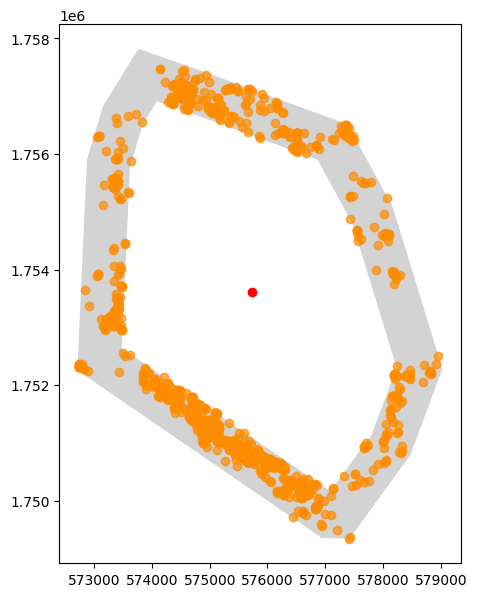

In [13]:
fig, ax = plt.subplots(figsize=(7, 7))
border_poly.plot(ax=ax,color="lightgrey")
border_points.plot(ax=ax, alpha=0.7, color="darkorange")
poly_centroid[0].plot(ax=ax,color="red")

In [14]:
poly_centroid = []
poly_centroid.append(border_poly.centroid)
print(type(poly_centroid[0].x))
print('')
print(border_points.iloc[0].geometry.x)

<class 'pandas.core.series.Series'>

574377.2118358931


In [15]:
 #azimuth calculation
def azimuth_calc(pt1,pt2): # takes a ST point

    dx = pt1.x - pt2.x
    dy = pt1.y - pt2.y

    Azimuth = math.degrees(math.atan(-dy/dx))


    if (dx < 0):
        Azimuth = Azimuth + 90
    else:
        Azimuth = Azimuth + 270


    # PI = math.pi
    # Azimuth = 4 * PI
    # if dx == 0:
    #     if dy >=0:
    #         Azimuth = 0
    #     else:
    #         Azimuth = 180
    # elif dx >0:
    #     Azimuth = 90 - math.atan( dy / dx ) * 180 / PI
    # elif dx <0:
    #     Azimuth = 270 - math.atan( dy / dy )* 180 / PI

    return Azimuth



In [16]:
# for i in range (50):#(len(border_points)):
centroid = poly_centroid[0].to_list()

#   print(azimuth_calc(centroid[0],border_points.iloc[i].geometry))

#   border_points["azimuth"][i] =  azimuth_calc(centroid[0],border_points.iloc[i].geometry)

border_points["azimuth"] =  [azimuth_calc(centroid[0],border_points.iloc[i].geometry) for i in range(len(border_points))]

In [17]:
low = 0
high = 45
oct = border_points.query( "azimuth > @low and azimuth < @high")



In [18]:
#print(oct)

In [19]:
def oct_query(low,high):
  oct = border_points.query( "azimuth > @low and azimuth < @high")
  return oct

In [20]:
#oct_query(0,45)


In [21]:
oct_ct = [oct_query(i,i+45) for i in range(0,360,45)]
oct_lgth = [len(i) for i in oct_ct]
#print(oct_lgth)

In [22]:
#print(oct_ct)

In [23]:
from traitlets.traitlets import Int
# total area for the grid https://james-brennan.github.io/posts/fast_gridding_geopandas/
xmin, ymin, xmax, ymax = series_tiger7203_sp.geometry.total_bounds
dxmin = xmin
dymin = ymin
dxmax = xmax
dymax = ymax

# how many cells across and down
# find the largest dimension
print((xmax-xmin),(ymax-ymin))
# find max
xdif = np.float128(xmax-xmin)
ydif = np.float128(ymax-ymin)

if (max(xdif,ydif) == ydif):
  xmax = xmax + np.float128(ydif-xdif)
else:
  xmax = ymax + np.float128(xdif-ydif)

print('new dif ',(xmax-xmin),(ymax-ymin))

# test
#level = 7   ####################### this is the quad level
dlevel = 4**level
cell_size = np.float128(np.float128(max(xdif,ydif ) / np.float128(dlevel ** 0.5)))
print(cell_size)
print('')

# now densify where distances between points must be greater than cell size to interpolate

#densified_points = point_densify(series_tiger7203_sp,cell_size)

#n_cells = (xmax = xmin)/800
# projection of the grid
#crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"
crs = "EPSG:32647" #WGS 84 / UTM zone 47N
# create the cells in a loop
ctx = 0

grid_cells = []
for x0 in np.arange(xmin, xmax, cell_size):
    ctx+=1
    #print('cty ',cty)
    cty = 0

    for y0 in np.arange(ymin, ymax, cell_size ): #-.513535):
        cty+=1
        #print(x0,y0)
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'],
                                 crs=crs)
#print('ctx ',ctx)

6313.101591897896 8479.490316613577
new dif  8479.490316613577306 8479.490316613577
132.49203619708714541



In [24]:
cell.shape

(4096, 1)

(572397.924285425, 579342.3360365127, 1748916.6817983964, 1758244.1211466712)

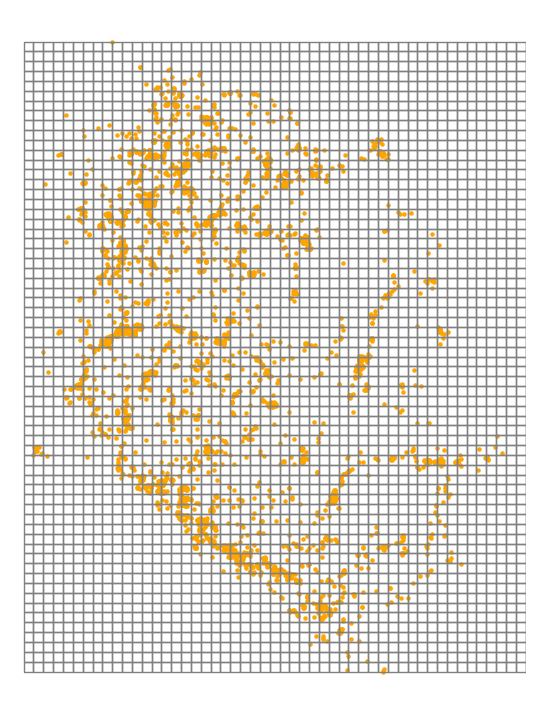

In [25]:
ax = series_tiger7203_sp.plot(markersize=5, figsize=(9, 9),color="orange")#, column='dob', cmap='jet')
plt.autoscale(False)
cell.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis("off")

In [26]:
!pip install import-ipynb
import import_ipynb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.9 MB/s eta 0:00:00


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
%ls

%cd drive/



drive/        tiger_points_anon.cpg  tiger_points_anon.prj  tiger_points_anon.shx
sample_data/  tiger_points_anon.dbf  tiger_points_anon.shp
/content/drive


In [29]:
%cd MyDrive/

/content/drive/MyDrive


In [30]:
%cd Colab_Notebooks/

/content/drive/MyDrive/Colab_Notebooks


In [31]:
ls

Assignments_2021/  L6_coords.json            move_util.py    STpoint_tig_newspeed.py
geom_util.py       L7_coords.json            pointclass.py   tiger_transform3.ipynb
L4_coords.json     L7_GPS_coded_morton.json  __pycache__/
L5_coords.json     Morton1.ipynb             raster_util.py


In [32]:
from Morton1 import mm_grid,intersperse,morton1

importing Jupyter notebook from Morton1.ipynb
done with gdal
 levels  8
d  256
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 256
[[    0     1     4 ... 21841 21844 21845]
 [    2     3     6 ... 21843 21846 21847]
 [    8     9    12 ... 21849 21852 21853]
 ...
 [43682 43683 43686 ... 65523 65526 65527]
 [43688 43689 43692 ... 65529 65532 65533]
 [43690 43691 43694 ... 65531 65534 65535]]



In [33]:
print(level)
#  create LQT for level
mg,d = mm_grid(level)
int_grid = morton1(mg,d)
# print(int_grid)

6
 levels  6
d  64
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 64


In [34]:
fint_grid = int_grid.flatten()
print(fint_grid)
cell['code'] = fint_grid.tolist()

[   0    1    4 ... 4091 4094 4095]


In [35]:
 #Example code
import geopandas as gpd

# pointdf = gpd.read_file(r'C:\GIS\data\testdata\bs_riks_sample.shp')
# polydf = gpd.read_file(r'C:\GIS\data\testdata\ak_riks_2.shp')

polyfield = 'code' #Field to join to the points

coded_morton = gpd.sjoin(left_df=df_tiger7203_sp, right_df=cell, how='left') #Join

In [36]:
cell_sub = cell.cx[dxmin:dxmax, dymin:dymax]
# type(cell_sub)
# print(cell_sub)
vocab = cell_sub['code']
# print('')
# print('posible vocaulary')
# print(vocab)

In [37]:
code_present = coded_morton['code']
print(code_present)
print(len(set(code_present)))
the_vocab = set(code_present)
#print((the_vocab))

0       496
1       503
2       500
3       500
4       500
       ... 
4869    978
4870    965
4871    965
4872    965
4873    965
Name: code, Length: 4875, dtype: int64
885


In [38]:
#print(coded_morton["code"])
my_codes = coded_morton["code"]

In [39]:
type(my_codes)

pandas.core.series.Series

In [40]:
import json
j_data = my_codes.to_numpy()
j_data = j_data.tolist()
#print(jay_data)
with open("L7_GPS_coded_morton.json", 'w') as file:
    json.dump(j_data, file, indent=2)


In [41]:
# encode and decode

def my_encode(vc):
  return (vocab == vc).nonzero(as_tuple=True)[0]

def my_decode(vc_index):
  return(vocab[vc_index])

In [42]:
# need to get the index into the vocab for each morton value
import torch
torch_tensor = torch.tensor(coded_morton['code'].values) # create tensor from morton codes of GPS points
vocab = torch.unique(torch_tensor, sorted=True, return_inverse=False, return_counts=False, dim=None) # get vocab
print(len(vocab))
vocab_size = len(vocab)
# now replace index of morton value in the vocab
# print (my_encode(278))
# print(my_decode(3))
# print(vocab)


885


In [43]:
tt_enc = [my_encode(i).item() for i in torch_tensor]
#print(tt_enc)
tt_enc = torch.tensor(tt_enc)
print(tt_enc)
#   #doubled = [x *2  for x in numbers]

tensor([ 94,  99,  96,  ..., 299, 299, 299])


In [44]:
##print(torch_tensor[:100])
#print("all ",torch_tensor.shape)
n = int(0.99*len(tt_enc))
print(n)
train_data = tt_enc[:n]
val_data = tt_enc[n:]

4826


In [45]:
# Hyper parameters
block_size = 8
torch.manual_seed(the_seed)
batch_size = 4 # how many independent sequences will we process in parallell?
device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_data[:block_size+1]
eval_iters = 5000
eval_interval = 5000

In [46]:
x = train_data[:block_size]
y = train_data[:block_size+1]
for t in range(block_size):
  context = x[:t+1]
  target = y[t]
 # print(f"when input is {context} the target: {target}")

In [47]:


def get_batch(split):
  #generate a small batch of data of inputs x and targets y
  data = train_data if split == 'train' else val_data
  ix = torch.randint(len(data) - block_size,(batch_size,))
  x = torch.stack([data[i:i+block_size] for i in ix])
  y = torch.stack([data[i+1:i+block_size+1] for i in ix])
  x, y = x.to(device), y.to(device)
  return x, y

@torch.no_grad()
def estimate_loss():
  out = {}
  m.eval()
  for split in ['train', 'val']:
    losses = torch.zeros(eval_iters)
    for k in range(eval_iters):
      X, Y = get_batch(split)
      logits, loss = model(X, Y)
      losses[k] = loss.item()
    out[split] = losses.mean()
  m.train()
  #print(' print out ',out)
  return out


xb , yb = get_batch('train')
# print('inputs:')
# print(xb.shape)
# print(xb)
# print('targets:')
# print(yb.shape)
# print(yb)

for b in range(batch_size):
   # batch dimension
   for t in range(block_size):
    # time dimention
    context = xb[b, :t+1]
    target = yb[b,t]
    #print(f"when input is {context.tolist()} the target: {target}")



In [48]:
import torch
import torch.nn as nn
from torch.nn import functional as F

class BigramLanguageModel(nn.Module):
  def __init__(self, vocab_size):
    super().__init__()
    # each token directly reads off the logits for the next token from a lookup table
    self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

  def forward(self, idx, targets=None):

      #idx and targets are both (B,T) tensor of integers
      logits = self.token_embedding_table(idx) # (B (batch size (4)),T (time (8)),C (vocab size 885))
      if targets is None:
        loss = None
      else:
          B, T, C = logits.shape
          logits = logits.view(B*T, C)
          targets = targets.view(B*T)
          loss = F.cross_entropy(logits, targets)

      return logits, loss

  def generate(self, idx, max_new_tokens):
    # idx is a (B, T) aray of indicies in the current context
    for _ in range(max_new_tokens):
      # get the predictions
      logits, loss = self(idx)
      # focus only on the last time step
      logits = logits[:, -1, :] # becomes (B, C)
      # apply softmax to get probabilities
      probs = F.softmax(logits, dim=-1)# (B, C)
      #sample from the distribution
      idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
      # append sampled index to the running sequence
      idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
    return idx

mx_t = 4873

model = BigramLanguageModel(vocab_size)
m = model.to(device)
logits, loss = m(xb, yb)
print(logits.shape)
print(loss)

#idx = torch.zeros((1,1), dtype=torch.long)
# now generate new tokens and decode
idx = torch.zeros((1,1),dtype=torch.long,device=device)

gen_t = m.generate(idx,max_new_tokens=mx_t)[0]
gen_lst = gen_t.tolist()
gen_d = [my_decode(i).tolist() for i in gen_lst]

torch.Size([32, 885])
tensor(7.1301, device='cuda:0', grad_fn=<NllLossBackward0>)


In [49]:
# create a PyTorch optimaizer
optimizer = torch.optim.Adam(m.parameters(), lr=1e-3)

In [50]:
batch_size = 32
for steps in range(50000):

  if steps % eval_interval ==0:
    losses = estimate_loss()
    print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
  #sample a batch of data
  xb,yb = get_batch('train')

  #evaluate the loss
  logits, loss = m(xb, yb)
  optimizer.zero_grad(set_to_none=True)
  loss.backward()
  optimizer.step()

#print(loss.item())

step <built-in function iter>: train loss 7.3331, val loss 7.5102
step <built-in function iter>: train loss 3.7384, val loss 7.3661
step <built-in function iter>: train loss 1.8522, val loss 7.3546
step <built-in function iter>: train loss 1.2358, val loss 7.5419
step <built-in function iter>: train loss 1.0454, val loss 7.8129
step <built-in function iter>: train loss 0.9967, val loss 8.1012
step <built-in function iter>: train loss 0.9840, val loss 8.3534
step <built-in function iter>: train loss 0.9805, val loss 8.5658
step <built-in function iter>: train loss 0.9801, val loss 8.7224
step <built-in function iter>: train loss 0.9792, val loss 8.8559


In [51]:
# now generate new tokens and decode
idx = torch.zeros((1,1),dtype=torch.long,device=device)

gen_t = m.generate(idx,max_new_tokens=mx_t)[0]
gen_lst = gen_t.tolist()
gen_d = [my_decode(i).tolist() for i in gen_lst]

In [52]:
print(-math.log(1/885))
idx = torch.zeros((1,1),dtype=torch.long)
# print(idx)
# print(gen_lst)
# print(gen_d)


6.785587645007929


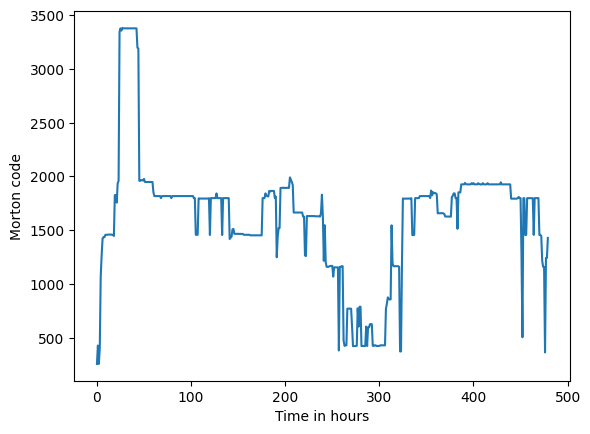

<Figure size 1000x1000 with 0 Axes>

In [53]:
plt.plot(gen_d[:480])
plt.ylabel('Morton code')
plt.xlabel('Time in hours')
plt.figure(figsize=(10,10))
plt.show()

In [54]:
find_cell = cell.query("code==255")
print(find_cell.geometry.exterior.values.centroid)

<GeometryArray>
[<POINT (574634.714 1751394.283)>]
Length: 1, dtype: geometry


In [55]:
# print(gen_d[0])
# print("length ",len(gen_d))

#geo_token = [cell.query("code==@i") for i in gen_d]
def get_coords(my_gen_d):

  geo_coords = [ ]
  for i in range(len(my_gen_d)):

    f_code = my_gen_d[i]
    find_cell = cell.query("code==@f_code")
    geo_coords.append(find_cell.geometry.values.centroid)
  return geo_coords

In [56]:
type(gen_d)

list

In [57]:
tig_coords = get_coords(gen_d)
tig_coords[0].y
np_tig = np.array(tig_coords)
np_tig[0]

array([<POINT (574634.714 1751394.283)>], dtype=object)

In [58]:
#print(tig_coords)

In [59]:
round(cell_size/2)

66

In [60]:
buff_one = xy_poly.buffer(round(cell_size/2),resolution=16) # outer
df_buff = gpd.GeoSeries([buff_one]).__geo_interface__
df_buff_m = gpd.GeoDataFrame.from_features(df_buff)
df_buff_m.crs = "EPSG:32647"


In [61]:
buff_in = xy_poly.buffer(-(buff_size+(round(cell_size/2))),resolution=16) # inner
buff_in = gpd.GeoSeries([buff_in]).__geo_interface__
buff_in = gpd.GeoDataFrame.from_features(buff_in)
buff_in.crs = "EPSG:32647"


<Axes: >

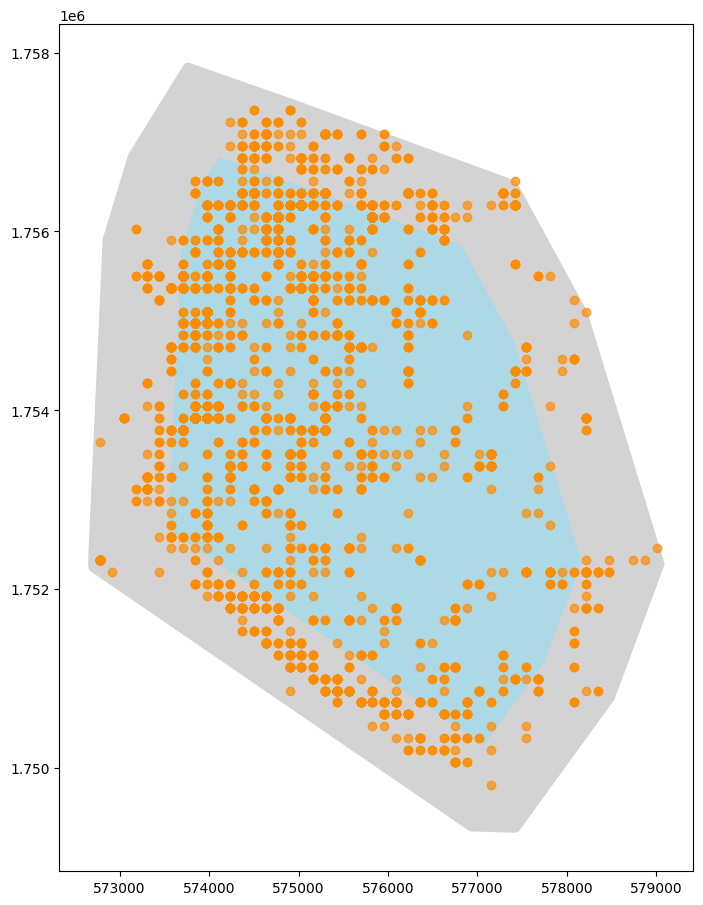

In [62]:
stt = gpd.GeoSeries(np_tig[0])
for i in range(1,len(np_tig)):
  stt1 = gpd.GeoSeries(np_tig[i])
  stt1 = pd.concat([stt,stt1])
  stt = stt1
fig, ax = plt.subplots(figsize=(11, 11))
#series_tiger7203_hr_sp.plot(ax=ax)
df_buff_m.plot(ax=ax,color="lightgrey")
buff_in.plot(ax=ax,color="lightblue")

stt.plot(ax=ax, alpha=0.7, color="darkorange")


<Axes: >

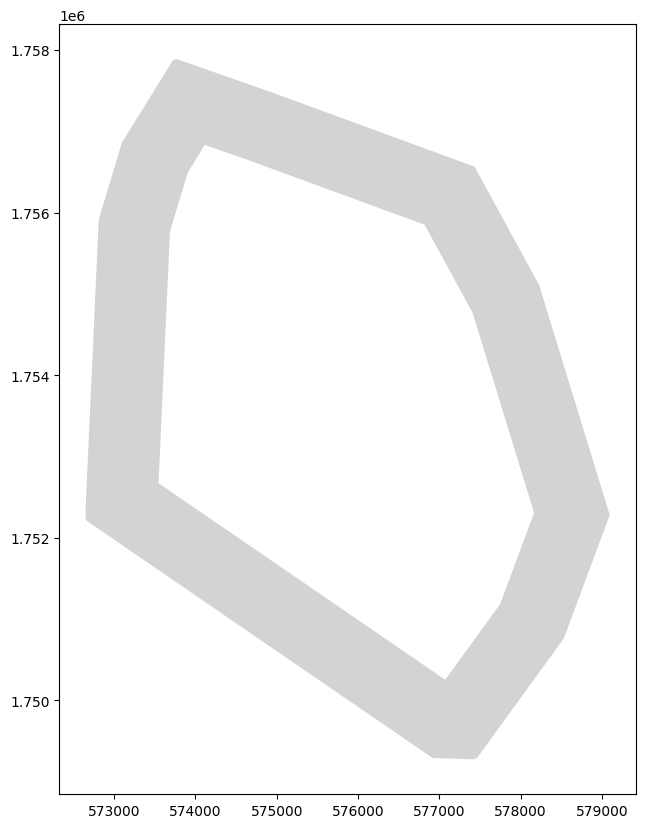

In [63]:
# overlay
border_poly = df_buff_m.overlay(buff_in, how='difference')
fig, ax = plt.subplots(figsize=(10, 10))
border_poly.plot(ax=ax,color="lightgrey")

In [64]:
df_1 = gpd.GeoDataFrame(gpd.GeoSeries(stt))
#print(df_1)
df_n = df_1.reset_index()
df_n.columns = ['index','geometry']
df_n.set_geometry('geometry',inplace=True)
#print(df_n)

border_points_l = gpd.sjoin(df_n,border_poly, how="inner", op='within')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-64-0713cd35f876>:8: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:32647

  border_points_l = gpd.sjoin(df_n,border_poly, how="inner", op='within')


<Axes: >

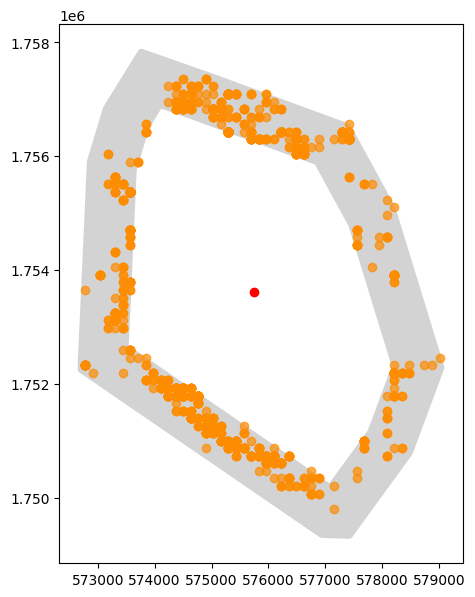

In [65]:
# overlay
fig, ax = plt.subplots(figsize=(7, 7))
border_poly.plot(ax=ax,color="lightgrey")
border_points_l.plot(ax=ax, alpha=0.7, color="darkorange")
poly_centroid[0].plot(ax=ax,color="red")

In [66]:
border_points_l["azimuth"] =  [azimuth_calc(centroid[0],border_points_l.iloc[i].geometry) for i in range(len(border_points_l))]

In [67]:
oct_1 = border_points.query( "azimuth > @low and azimuth < @high")

In [68]:
border_points = border_points_l
oct_ct = [oct_query(i,i+45) for i in range(0,360,45)]
oct_lgth = [len(i) for i in oct_ct]
print(oct_lgth)

[219, 48, 57, 153, 389, 97, 172, 336]


<ipython-input-69-43bb129a76ab>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(xx,yy, 'bo', linestyle="-",color="darkorange")


<Axes: >

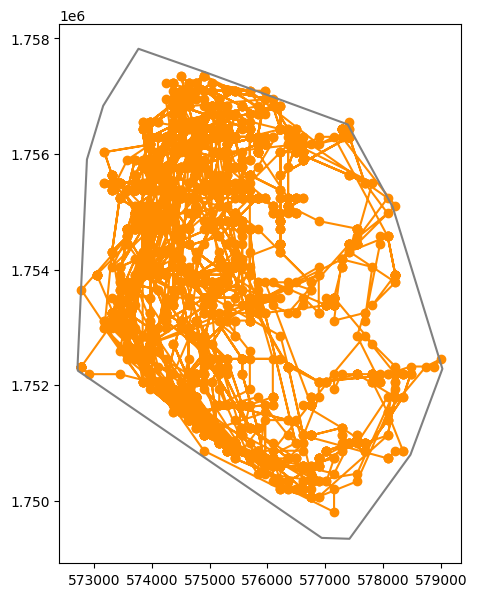

In [69]:

xx = (stt.apply(lambda p: p.x))
yy = (stt.apply(lambda p: p.y))
fig, ax = plt.subplots(figsize=(7, 7))
plt.plot(xx,yy, 'bo', linestyle="-",color="darkorange")
df_xy.boundary.plot(ax=ax,color="grey")

# fig, ax = plt.subplots(figsize=(11, 11))
# stt.plot(ax=ax, alpha=0.7, color="darkorange")
# series_tiger7203_hr_sp.boundary.plot(ax=ax)
# # print(stt[0].y)

In [70]:
print(type(stt))
stt_np = stt.to_numpy()
print(stt_np[0].x)

stt_c = [[stt_np[i].x,stt_np[i].y] for i in range(len(stt_np))]


<class 'geopandas.geoseries.GeoSeries'>
574634.7138898777


In [71]:
# # 3-D plot
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# len(xx)
# zz = [i for i in range(len(xx))]
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(xx, yy, zz, c='r', marker='o')

Write the file

In [72]:
print(stt_c)
import json
with open("L7_coords.json", 'w') as file:
    json.dump(stt_c, file, indent=2)

# Read JSON file
with open('L7_coords.json') as data_file:
    data_loaded = json.load(data_file)

#print(data_loaded)

[[574634.7138898777, 1751394.2828752815], [574634.7138898777, 1751526.7749114793], [574634.7138898777, 1751394.2828752815], [573839.7616726952, 1752056.7430562675], [573574.777600301, 1753646.6474906323], [574237.2377812865, 1755501.5359973917], [574104.7457450893, 1756031.50414218], [574104.7457450893, 1756296.4882145743], [574104.7457450893, 1756296.4882145743], [574237.2377812865, 1756296.488214574], [574237.2377812865, 1756296.488214574], [574237.2377812865, 1756296.488214574], [574369.7298174833, 1756296.4882145743], [574369.7298174833, 1756296.4882145743], [574369.7298174833, 1756296.4882145743], [574369.7298174833, 1756296.4882145743], [574237.2377812865, 1756296.488214574], [574237.2377812865, 1756296.488214574], [574237.2377812865, 1756163.9961783772], [575297.1740708632, 1755899.0121059828], [575429.6661070602, 1755766.5200697856], [576224.6183242428, 1755369.0439611943], [576224.6183242428, 1756031.50414218], [576489.6023966369, 1756031.50414218], [576887.0785052282, 1756296

In [73]:
###### %%%%%%%%%%%%%%%%%%%%%%%% testing for tiger7203
print(type(stt))
tig_np = series_tiger7203_sp.to_numpy()
print(tig_np[0].x)

tig_c = [[tig_np[i].x,tig_np[i].y] for i in range(len(tig_np))]
type(tig_c)

<class 'geopandas.geoseries.GeoSeries'>
574215.9718742738


list

In [74]:
type(stt_c)
stt_c_np = np.array(stt_c)
print((stt_c_np[0]))
print(stt_c_np[0][:1],stt_c_np[0][1:])
x_coord = [stt_c_np[i][:1] for i in range(len(stt_c_np))]
y_coord = [stt_c_np[i][1:] for i in range(len(stt_c_np))]
print(len(x_coord))

x_min = min(x_coord)
x_max = max(x_coord)
y_min = min(y_coord)
y_max = max(y_coord)

[ 574634.71388988 1751394.28287528]
[574634.71388988] [1751394.28287528]
4874


In [75]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from matplotlib import rc
rc('animation', html='jshtml')

In [76]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.animation as animation

In [77]:
#print(tig_c)

In [78]:
############### testing
def frame(w):
    #print(w)
    ax.clear()
    #global x1,y1
    #np_tig[0][0].x
    x1=np_tig[w][0].x
    #print(len(x))
    y1=np_tig[w][0].y
    #z=z+np.random.normal(loc=0.0,scale=50.0,size=10)

    # use 4700

   #sub_4700 = series_tiger7203_sp[w], for w in range(4700)

    plt.title("Untrained")
    ax.set_xlabel('Easting')
    ax.set_xlim(x_min-1000,x_max+2000)
    ax.set_ylabel('Northing')
    ax.set_ylim(y_min-1000,y_max+1000)
    #stt.plot(ax=ax, alpha=0.7, color="darkorange")
    # ax.set_zlabel('Z(t)')
    # ax.set_zlim3d(-500.0,500.0)
    #fig= plt.subplots(figsize=(11,11))
    # plot=ax.scatter(x1, y1, c='darkorange')
    # series_tiger7203_sp.boundary.plot(ax=ax)
    # return plot

In [79]:
anim = animation.FuncAnimation(fig, frame, frames=300, blit=False, repeat=True)

In [80]:
#anim

vis original data


In [81]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from matplotlib import rc
rc('animation', html='jshtml')

In [82]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.animation as animation

In [83]:
series_tiger7203_sp[0].x

574215.9718742738

In [84]:
#fig, ax = plt.subplots(figsize=(11, 11))

In [85]:
############### testing
def frame(w):
    #print(w)
    ax.clear()
    #global x1,y1
    #np_tig[0][0].x
    x1=series_tiger7203_sp[w].x
    #print(len(x))
    y1=series_tiger7203_sp[w].y
    #z=z+np.random.normal(loc=0.0,scale=50.0,size=10)

    plt.title("Untrained")
    ax.set_xlabel('Easting')
    ax.set_xlim(minx-1000 ,maxx + 1000)
    ax.set_ylabel('Northing')
    ax.set_ylim(miny-500,maxy+500)
    #stt.plot(ax=ax, alpha=0.7, color="darkorange")
    # ax.set_zlabel('Z(t)')
    # ax.set_zlim3d(-500.0,500.0)
    #fig= plt.subplots(figsize=(11,11))
    plot=ax.scatter(x1, y1, c='darkorange')
    series_tiger7203_hr_sp.boundary.plot(ax=ax)
    return plot

In [86]:
#anim = animation.FuncAnimation(fig, frame, frames=500, blit=False, repeat=True)

In [87]:
#anim

In [88]:
sub_4700 = series_tiger7203_sp[0:4700]

<ipython-input-89-b06d526c7eb9>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(xx,yy, 'bo', linestyle="-",color="darkorange")


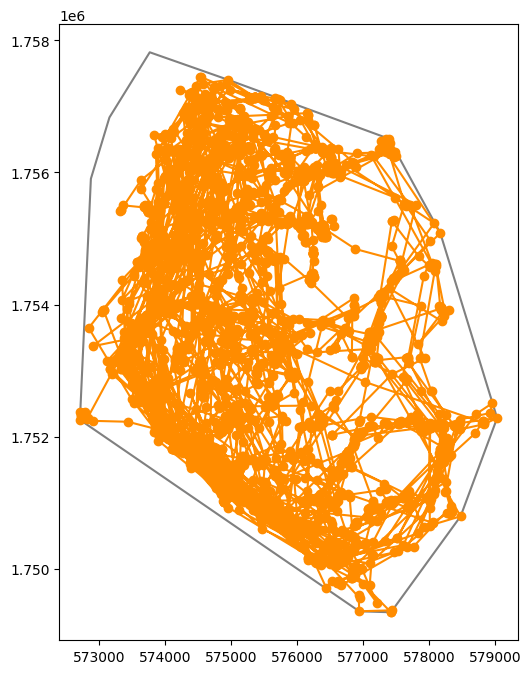

In [89]:

xx = (sub_4700.apply(lambda p: p.x))
yy = (sub_4700.apply(lambda p: p.y))
fig, ax = plt.subplots(figsize=(7, 8))
df_xy.boundary.plot(ax=ax,color="grey")
plt.plot(xx,yy, 'bo', linestyle="-",color="darkorange")

In [90]:
#######  get intersection of buffer with asimth 0-360 degrees ###########
def point_boundary_intersections(center_point,lr_bound,l_dist):
    eight_points = []
    for i in range(8):

        delta_x,delta_y = compute_angle_distance_move(i*45,l_dist)
        #print'i ',i,' delta_x & delta_y ',delta_x,' ',delta_y
        eight_points.append((delta_x,delta_y))

    new_points =[]
    for i in range(8):
        #print'i ',i,' x ',center_point[0][0] + eight_points[i][0],' y ', center_point[0][1] + eight_points[i][1]
        new_point = S_Point(center_point[0][0] + eight_points[i][0],center_point[0][1] + eight_points[i][1])
        #print' new point ',new_point,'i ',i
        new_points.append(new_point)

    new_lines = []

    for i in range(8):

        az_line = LineString([(center_point[0][0],center_point[0][1]),(new_points[i].x,new_points[i].y)])
        new_lines.append(az_line)

    int_points = []
    for i in range(8):
        intersect_point = new_lines[i].intersection(lr_bound)
        #print'i ',i,' intersect_point ',intersect_point
        int_points.append(intersect_point)
    return(int_points,new_lines)

